<h2><center>Applied Machine Learning - Assignment 2</center></h2>
<h4><center>Lorenzo Cirac Monteagduo</center></h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h3>Question 1 - Pandas</h3>

<h4>Dataset Exploration</h4>
<p>Download Gasprices.csv. This dataset contains information about the
sales of gas stations across a city along with other attributes. You will analyze this dataset using
pandas library and plot some interesting information using the matplotlib library.</p>
<ul>
    <li>Load the data using pandas</li>
    <li>Summarize each NUMERIC field</li>
    <li>Group data by the field Name: <ul>
            <li>Find the average price, average income, and average number of pumps for each group.</li>
            <li>Use a boxplot that visualizes the statistical information about (price, pumps, gasoline).</li>
            <li>Use the Price and Income features to plot a prediction line similar to the first exercise.
Normalize the Income (implement this yourself) and plot the line again. Comment on
the difference between the two plots.</li>
        </ul>
    </li>
</ul>

<h4>Solution</h4>
<p>Let's begin with loading in gasprices.csv in a pandas dataframe. To summarize each numeric field in the data, such as the mean, standard deviation, and other statistics, we can use the pandas.describe() function. This will provide information about the mean, standard deviation, and other key statistics for each numeric field.</p>

In [2]:
gasprices = pd.read_csv('res/gasprices.csv')

gasprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             101 non-null    int64  
 1   ID                     101 non-null    int64  
 2   Name                   101 non-null    object 
 3   Price                  101 non-null    float64
 4   Pumps                  101 non-null    int64  
 5   Interior               101 non-null    object 
 6   Restaurant             101 non-null    object 
 7   CarWash                101 non-null    object 
 8   Highway                101 non-null    object 
 9   Intersection           101 non-null    object 
 10  Stoplight              101 non-null    object 
 11  IntersectionStoplight  94 non-null     object 
 12  Gasolines              101 non-null    int64  
 13  Competitors            101 non-null    object 
 14  Zipcode                101 non-null    int64  
 15  Addres

In [3]:
gasprices[['Price', 'Pumps', 'Gasolines', 'Income']].describe()

,Price,Pumps,Gasolines,Income
count,101.000000,101.000000,101.000000,101.000000
mean,1.864257,6.950495,3.465347,56727.217822
std,0.081515,3.925242,0.557931,25868.359804
min,1.730000,2.000000,1.000000,12786.000000
25%,1.790000,4.000000,3.000000,37690.000000
50%,1.850000,6.000000,3.000000,52306.000000
75%,1.920000,8.000000,4.000000,70095.000000
max,2.090000,24.000000,4.000000,128556.000000


<p>For this task, we will combine the groupby() function with the agg() function. First, we will group our data by
the "Name" column. Then, we will use the agg() function to create the columns Avg_Price, Avg_Income, and
Avg_Pumps, where we will apply the mean function to each numeric field. In the end, we use the reset_index()
function to convert the grouped result back into a DataFrame with a default integer index.</p>

In [4]:
grouped_df = gasprices.groupby('Name').agg(
     Avg_Price = ('Price', 'mean'),
     Avg_Income = ('Income', 'mean'),
     Avg_Pumps = ('Pumps', 'mean')
).reset_index()

grouped_df

,Name,Avg_Price,Avg_Income,Avg_Pumps
0,7-Eleven,1.887778,53432.333333,4.666667
1,Around the Corner Store,1.940000,63750.000000,2.000000
2,Chevron,1.871818,61754.636364,8.727273
3,Citgo,1.835000,49387.000000,4.000000
4,Conoco,1.890000,43545.500000,4.000000
5,Costco,1.730000,70095.000000,12.000000
6,Double R Grocery,1.790000,37690.000000,4.000000
7,East 1st Grocery,1.770000,37690.000000,4.000000
8,Exxon,1.855000,52344.333333,11.500000
9,Gulf,1.788571,50084.142857,5.714286


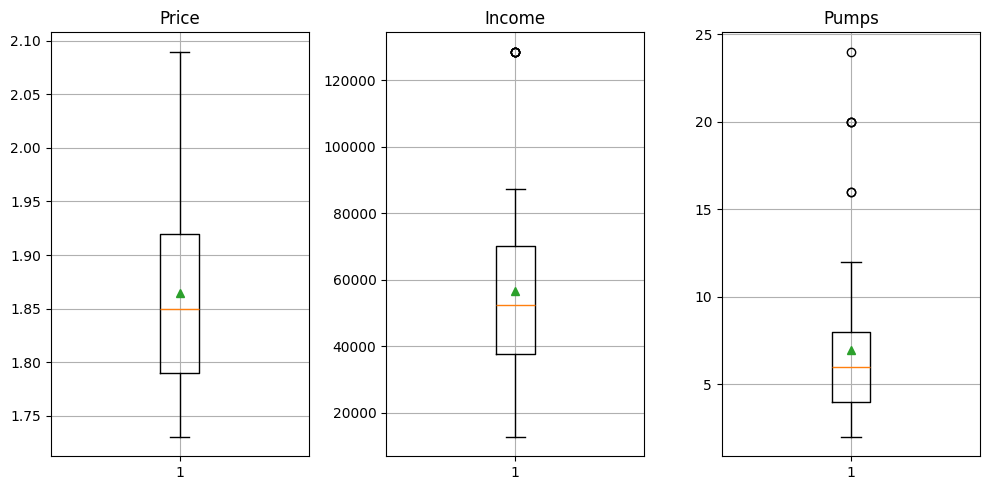

In [5]:
fig = plt.figure(figsize = (10,5))
axs = fig.subplots(1, 3)

data_columns = ['Price', 'Income', 'Pumps']
for i, data in enumerate(data_columns):
     axs[i].set_title(data)
     axs[i].boxplot(gasprices[data], showmeans = True)
     axs[i].grid()
    
plt.tight_layout()
plt.show()

<p>To plot our prediction line between income and price, we can utilize our leanSimpleRegression() and
predictSimpleRegression() functions from the previous exercise.</p>

In [6]:
def learn_simple_linear_reg(x, y):
    x_mean = x.mean()
    y_mean = y.mean()

    beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    beta_0 = y_mean - beta_1 * x_mean

    return beta_0, beta_1

def predict_simple_linear_reg(x, beta_0, beta_1):
    y_hat = beta_0 + beta_1 * x
    return y_hat

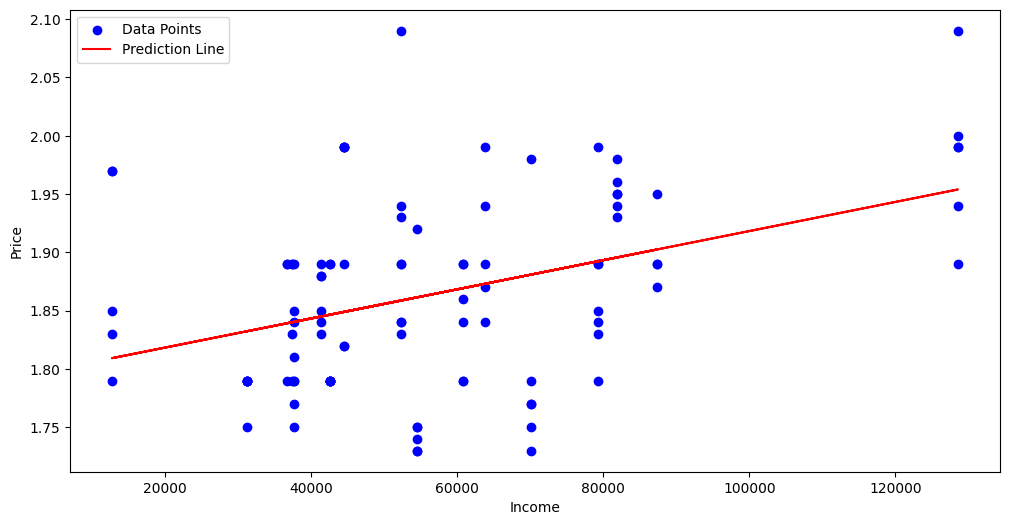

In [7]:
beta_0, beta_1 = learn_simple_linear_reg(gasprices['Income'], gasprices['Price'])
y_prediction = predict_simple_linear_reg(gasprices['Income'], beta_0, beta_1)

plt.figure(figsize = (12,6))
plt.scatter(gasprices['Income'], gasprices['Price'], color = 'blue', label = 'Data Points')
plt.plot(gasprices['Income'], y_prediction, color = 'red', label = 'Prediction Line')
plt.xlabel('Income')
plt.ylabel('Price')
plt.legend()
plt.show()

<p>Now we will normalize our data:</p>
$$X' = \frac{X - min(X)}{max(X) - min(X)}$$

In [8]:
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

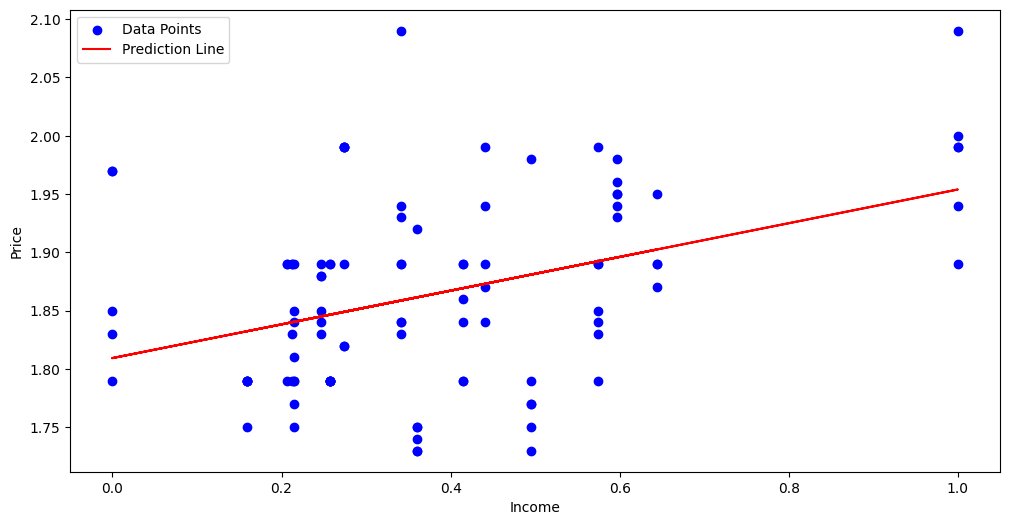

In [9]:
beta_0, beta_1 = learn_simple_linear_reg(normalize(gasprices['Income']), gasprices['Price'])
y_prediction = predict_simple_linear_reg(normalize(gasprices['Income']), beta_0, beta_1)

plt.figure(figsize = (12,6))
plt.scatter(normalize(gasprices['Income']), gasprices['Price'], color = 'blue', label = 'Data Points')
plt.plot(normalize(gasprices['Income']), y_prediction, color = 'red', label = 'Prediction Line')
plt.xlabel('Income')
plt.ylabel('Price')
plt.legend()
plt.show()

<p>To facilitate comparison between the two plots, we will display them side by side:</p>

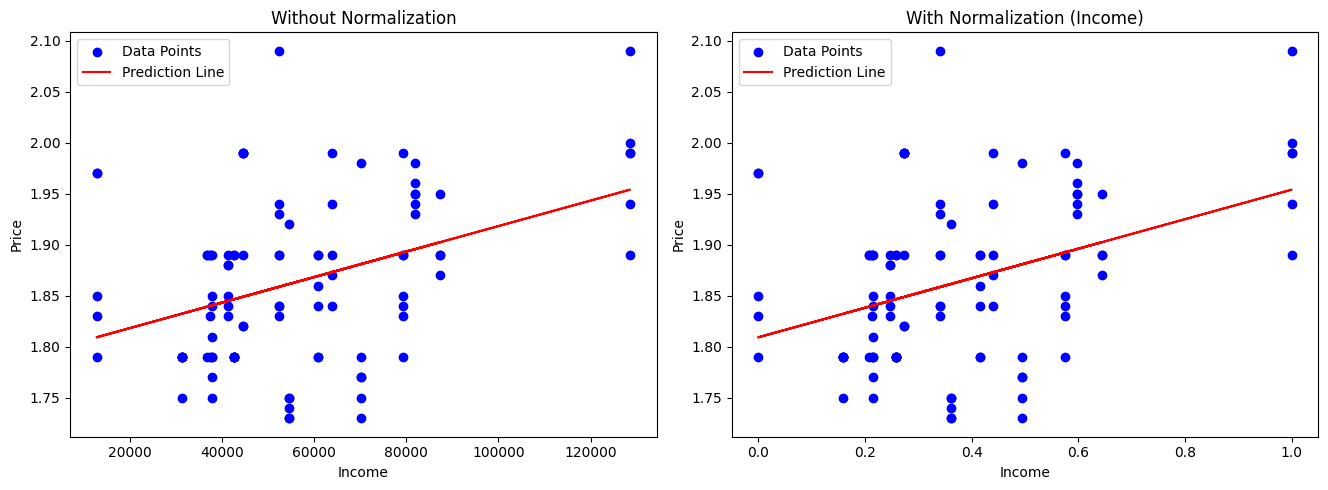

In [10]:
plt.figure(figsize=(20, 5))
normalizations = [None, normalize]
titles = ['Without Normalization', 'With Normalization (Income)']
for i, (norm, title) in enumerate(zip(normalizations, titles), start=1):

    # Apply normalization
     income = gasprices['Income'] if norm is None else normalize(gasprices['Income'])

     beta_0, beta_1 = learn_simple_linear_reg(income, gasprices['Price'])
     y_prediction = predict_simple_linear_reg(income, beta_0, beta_1)

     plt.subplot(1, 3, i)
     plt.scatter(income, gasprices['Price'], color = 'blue', label = 'Data Points')
     plt.plot(income, y_prediction, color = 'red', label = 'Prediction Line')
     plt.title(title)
     plt.xlabel('Income')
     plt.ylabel('Price')
     plt.legend()
    
plt.tight_layout()
plt.show()

<p>By rescaling income to a [0, 1] range, normalization removes the effect of magnitude differences between
income and price. In this case, normalization doesn’t significantly change the visual appearance of the data distribution or the relationship between income and price.</p>

<h3>Question 2 - Linear Regression via Normal Equations</h3>

<p>In this exercise, you will implement (multiple) linear regression using Normal Equations. The learning
algorithm is below.</p>
<ul>
    <li>Reuse the Gasprices.csv dataset. Load it as Xdata.</li>
    <li>Choose columns that help with prediction (i.e., contain useful information). Drop irrelevant
columns, and explain your reasoning for choosing or dropping any column.</li>
    <li>Split your dataset Xdata, Ydata into Xtrain, Ytrain, and Xtest, Ytest (randomly assign 80%
to Xtrain, Ytrain and the remaining 20% to Xtest, ytest).</li>
    <li>Implement the learn-linreg-NormEq algorithm and learn a parameter vector β using the Xtrain
set. You need to learn a model to predict the sales price of houses, i.e., ytest.</li>
    <li>Line 6 of the learn-linreg-NormEq algorithm uses SOLVE-SLE. You must replace SOLVE-SLE
with the following options (implement this yourself):
        <ul>
            <li>Gaussian elimination</li>
            <li>Cholesky decomposition</li>
            <li>QR decomposition</li>
        </ul>
    </li>
    <li>Perform predictions $\hat{y}$ on the test dataset Xtest using the parameters learned in steps 5 and 6.
[Hint: You will have three different prediction models based on the replacement function from step
6.]</li>
    <li> The final step is to find how close these three models are to the original values.
        <ul>
            <li>Plot the residual $\epsilon = |y_{test} - \hat{y}|$ versus the true value of ytest for each model.</li>
            <li>Find the average residual $\epsilon = |y_{test} - \hat{y}|$ for each model</li>
            <li>Compute the root-mean-square error (RMSE) as follows
                $$RMSE = \sqrt{\frac{\sum_{n=1}^{N} (y_{test}(n) - \hat{y}(n))^2}{N}}$$
for each model.</li>
        </ul>
    </li>
</ul>

<h4>Task 2.1</h4>
<p>Reuse the Gasprices.csv dataset. Load it as Xdata.</p>
<h4>Solution</h4>

In [11]:
Xdata = pd.read_csv('res/gasprices.csv')

<h4>Task 2.2</h4>
<p>Choose columns that help with prediction (i.e., contain useful information). Drop irrelevant
columns, and explain your reasoning for choosing or dropping any column.</p>
<h4>Solution</h4>

As demonstrated in Task 1, we initially predicted the gas price using only income as the independent variable.
Now, we aim to enhance our prediction accuracy by incorporating additional variables. Once again, let's
review our data to determine which information we should use:

In [12]:
Xdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             101 non-null    int64  
 1   ID                     101 non-null    int64  
 2   Name                   101 non-null    object 
 3   Price                  101 non-null    float64
 4   Pumps                  101 non-null    int64  
 5   Interior               101 non-null    object 
 6   Restaurant             101 non-null    object 
 7   CarWash                101 non-null    object 
 8   Highway                101 non-null    object 
 9   Intersection           101 non-null    object 
 10  Stoplight              101 non-null    object 
 11  IntersectionStoplight  94 non-null     object 
 12  Gasolines              101 non-null    int64  
 13  Competitors            101 non-null    object 
 14  Zipcode                101 non-null    int64  
 15  Addres

<strong>Columns to keep:<strong>
<ul>
    <li>Income: According to the definition of income from the data set source
(https://github.com/jgscott/learnR/blob/master/cases/gasprices/gasprices.md), it is the median
household income of the zip code where the gas station is located.</li>
    <li>Pumps: The number of pumps indicates the capacity of a gas station to serve customers simultaneously,
which directly impacts income and gas price.</li>
    <li>Interior: A well-designed interior could attract and appeal to customers.</li>
    <li>Restaurant: Having a restaurant could attract and appeal to customers.</li>
    <li>CarWash: A car wash could attract and appeal to customers, too, particularly since most customers arrive
by car.</li>
    <li>Highway: Gas stations located on the highway tend to attract more customers.</li>
    <li>Intersection: Gas stations located at intersections tend to attract more customers</li>
    <li>Stoplight: If a gas station is close to a stoplight, it might encourage people waiting to stop by.</li>
    <li>Gasolines: The variety of gasoline types offered is a key factor for customer attraction.</li>
    <li>Competitors: The number of competitors also influences gas prices.</li>
    <li>Price: This is what we want to predict.</li>
</ul>

<strong>Columns to drop:</strong>
<ul>
    <li>"Unnamed: 0": This is only a column for identification and is not important for the prediction.</li>
    <li>ID: This is only a column for identification and is not important for the prediction.</li>
    <li>Name: The name of a gas station generally does not affect the gas prices.</li>
    <li>IntersectionStoplight: Since we already keep “Intersection” and “Stoplight”, we leave out this column
(behaves like the logical AND).</li>
    <li>Zipcode: As we already have “Income” (the median household income of the zip code in which the petrol
station is located) in our dataset, we no longer need this entry.</li>
    <li>Address: As we already have “Income” (the median household income of the zip code in which the petrol
station is located) in our dataset, we no longer need this entry.</li>
    <li>Brand: The Brand of a gas station could affect its gas prices slightly but generally not.</li>
</ul>

In [13]:
Xdata = Xdata.drop(columns = ['Unnamed: 0', 'ID', 'Name', 'IntersectionStoplight', 'Zipcode', 'Address', 'Brand'])

<p>In order to perform the regression later, we now have to transform the bool columns of our selected data
into 1 and 0:</p>

In [14]:
bool_columns = ['Interior', 'Restaurant', 'CarWash', 'Highway', 'Intersection', 'Stoplight', 'Competitors']

for column in bool_columns:
    Xdata[column] = Xdata[column].map({'Y': 1, 'N': 0})

<h4>Task 2.3</h4>
<p>Split your dataset Xdata, Ydata into Xtrain, Ytrain, and Xtest, Ytest (randomly assign 80% to Xtrain, Ytrain and the remaining 20% to Xtest, ytest).</p>
<h4>Solution</h4>
<p>Since we are not allowed to use a machine learning library, we have to do the random splitting, testing and
training of the data ourselves. We first start by shuffling our data:</p>

In [15]:
Xdata = Xdata.sample(frac = 1)

<p>Now we can separate our data. Since we want to predict the income at the end, we remove the price column
from Xdata:</p>

In [16]:
Ydata = Xdata['Price']
Xdata = Xdata.drop('Price', axis = 1)

In [17]:
partition = int(len(Xdata) * 0.8)

# 80%
Xtrain, Ytrain = Xdata[:partition].to_numpy(), Ydata[:partition].to_numpy()

# 20%
Xtest, Ytest = Xdata[partition:].to_numpy(), Ydata[partition:].to_numpy()

<h4>Task 2.4</h4>
<p>Implement the learn-linreg-NormEq algorithm and learn a parameter vector β using the Xtrain
set. You need to learn a model to predict the sales price of houses, i.e., ytest.</p>
<h4>Solution</h4>

<img src = "res/Learn LinReg NormEq Algorithm.png">

<p>Our method includes the “method” parameter. This is for later tasks. We also need to give our data a column
of ones:</p>

In [18]:
def learnLinRegNormEq(x, y, method):
    x0 = np.ones((len(x),1))
    
    X = np.hstack((x0, x))
    Y = y

    A = X.T @ X
    b = X.T @ y

    beta_hat = SOLVE_SLE(A, b, method)
    return beta_hat[0], beta_hat[1:]

<h4>Task 2.5</h4>
<p>Line 6 of the learn-linreg-NormEq algorithm uses SOLVE-SLE. You must replace SOLVE-SLE
with the following options (implement this yourself)</p>
<h4>Solution</h4>

<h4>Gaussian elimination</h4>

In [19]:
# https://www.mycompiler.io/view/KWZrmHlI8yq

def gaussian_elimination(A, b):
    n = len(b)
    
    for k in range(n - 1):
        for i in range(k + 1, n):
            factor = A[i, k] / A[k, k]
            b[i] = b[i] - factor * b[k]
            for j in range(k, n):
                A[i, j] = A[i, j] - factor * A[k, j]
                
    beta_hat = np.zeros(n)
    beta_hat[n-1] = b[n - 1] / A[n - 1, n - 1]
    for i in range(n - 2, -1, -1):
        sum = b[i]
        for j in range(i + 1, n):
            sum = sum - A[i, j] * beta_hat[j]
        beta_hat[i] = sum / A[i, i]
        
    return beta_hat

<h4>Cholesky Decomposition</h4>

In [20]:
# https://numpy.org/doc/1.25/reference/generated/numpy.linalg.c

def cholesky_decomposition(A, b):
    L = np.linalg.cholesky(A)
    y = np.linalg.solve(L, b)
    beta_hat = np.linalg.solve(L.T, y)
    return beta_hat

<h4>QR Decomposition</h4>

In [21]:
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.ht

def qr_decomposition(A, b):
    Q, R = np.linalg.qr(A)
    p = np.dot(Q.T, b)
    beta_hat = np.dot(np.linalg.inv(R), p)
    return beta_hat

<h4>SOLVE_SLE</h4>

In [22]:
def SOLVE_SLE(A, b, method):
    if method == 1:
        return gaussian_elimination(A, b)
    if method == 2:
        return cholesky_decomposition(A, b)
    if method == 3:
        return qr_decomposition(A, b)

<h4>Task 2.6</h4>
<p>Perform predictions $\hat{y}$ on the test dataset Xtest using the parameters learned in steps 5 and 6.
[Hint: You will have three different prediction models based on the replacement function from step
6.]</p>
<h4>Solution</h4>

In [23]:
X0 = np.ones((len(Xtest)))

# Gaussian elimination method
beta_0, beta_1 = learnLinRegNormEq(Xtrain, Ytrain, 1)
y_prediction_1 = X0 * beta_0 + Xtest @ beta_1

# Cholesky decomposition method
beta_0, beta_1 = learnLinRegNormEq(Xtrain, Ytrain, 2)
y_prediction_2 = X0 * beta_0 + Xtest @ beta_1

# QR decomposition method
beta_0, beta_1 = learnLinRegNormEq(Xtrain, Ytrain, 3)
y_prediction_3 = X0 * beta_0 + Xtest @ beta_1

<h4>Task 2.7.1</h4>
<p>Plot the residual $\epsilon = |y_{test} - \hat{y}|$ versus the true value of ytest for each model.</p>
<h4>Solution</h4>

In [24]:
def residual(y_test, y_prediction):
    return abs(y_test - y_prediction)

In [25]:
residual_1 = residual(Ytest, y_prediction_1)
residual_2 = residual(Ytest, y_prediction_2)
residual_3 = residual(Ytest, y_prediction_3)

<p>Now we can plot the residual against the true y values for each method:</p>

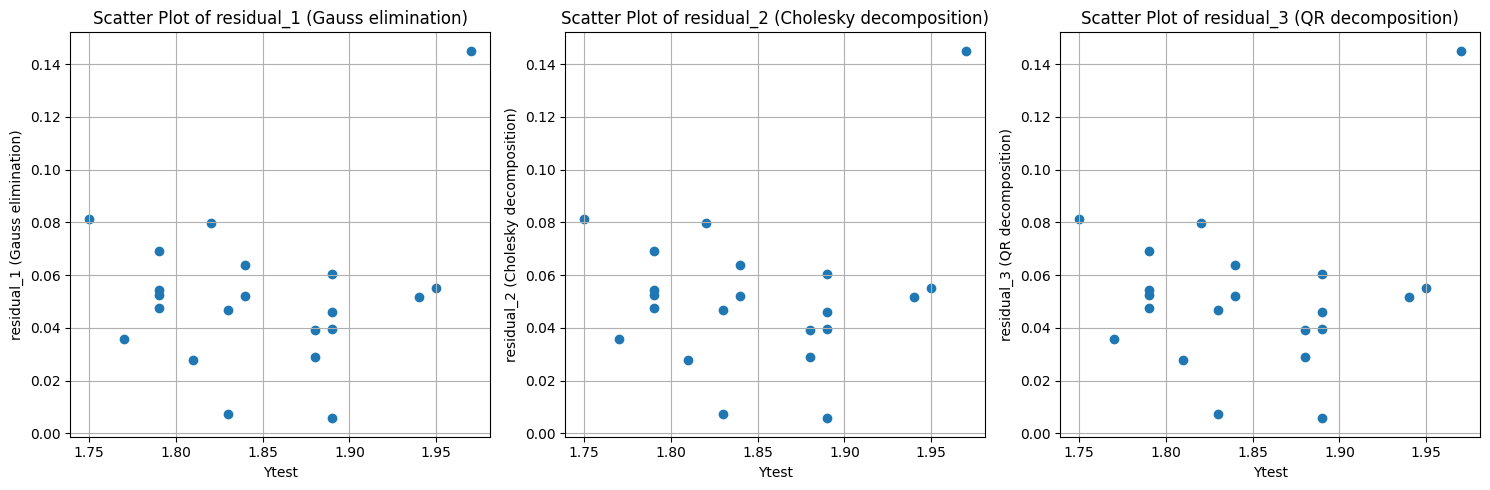

In [26]:
residuals = [residual_1, residual_2, residual_3]
labels = ['residual_1 (Gauss elimination)', 'residual_2 (Cholesky decomposition)', 'residual_3 (QR decomposition)']

plt.figure(figsize = (15,5))
for i, (residual, label) in enumerate(zip(residuals, labels), start = 1):
    plt.subplot(1, 3, i)
    plt.scatter(Ytest, residual)
    plt.ylabel(label)
    plt.xlabel('Ytest')
    plt.title(f'Scatter Plot of {label}')
    plt.grid()
    
plt.tight_layout()
plt.show()

<h4>Task 2.7.2</h4>
<p>Find the average residual $\epsilon = |y_{test} - \hat{y}|$ for each model</p>
<h4>Solution</h4>

In [27]:
residuals = [residual_1, residual_2, residual_3]

for i, residual in enumerate(residuals):
    print(f'Average of residual_{i + 1}: {residual.mean()}')

Average of residual_1: 0.051890421748097104
Average of residual_2: 0.051890421748097514
Average of residual_3: 0.05189042179764075


<h4>Task 2.7.3</h4>
<p>Compute the root-mean-square error (RMSE) as follows
                $RMSE = \sqrt{\frac{\sum_{n=1}^{N} (y_{test}(n) - \hat{y}(n))^2}{N}}$
for each model.</p>
<h4>Solution</h4>

In [28]:
def RMSE(y_test, y_prediction):
    rmse = np.sqrt(np.mean((y_test - y_prediction) ** 2))
    return rmse

In [29]:
y_predictions = [y_prediction_1, y_prediction_2, y_prediction_3]

for i, y_prediction in enumerate(y_predictions):
    print(f'RSME using y_prediction_{i + 1}: {RMSE(Ytest, y_prediction)}')

RSME using y_prediction_1: 0.05907442772779487
RSME using y_prediction_2: 0.05907442772779434
RSME using y_prediction_3: 0.05907442773323893
